In [1]:
pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
# import matplotlib as pyplot
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Placement Preparation\WIDS Project\HCLTECH.csv",index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of the data',df.shape)
df.head(30)

Shape of the data (2354, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,1.475043e+13,4845.0,146731.0,0.5100
2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,1.578028e+13,6701.0,144265.0,0.4689
2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,1.947326e+13,9447.0,143384.0,0.3782
2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,1.449495e+13,5368.0,100251.0,0.3514
2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,2.061968e+13,8530.0,262636.0,0.6506
2011-06-08,HCLTECH,EQ,511.80,512.00,512.70,508.55,512.00,510.95,510.92,160600,8.205409e+12,3450.0,75403.0,0.4695
2011-06-09,HCLTECH,EQ,510.95,503.70,508.95,497.70,508.00,507.70,503.70,453600,2.284773e+13,8936.0,98064.0,0.2162
2011-06-10,HCLTECH,EQ,507.70,504.00,508.55,501.10,502.25,502.85,503.71,180156,9.074632e+12,9120.0,79915.0,0.4436
2011-06-13,HCLTECH,EQ,502.85,501.00,506.00,496.50,500.95,500.35,501.95,372637,1.870439e+13,4072.0,269540.0,0.7233


In [5]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('HCLTECH.csv')
TempData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [6]:
#Data Cleaning
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

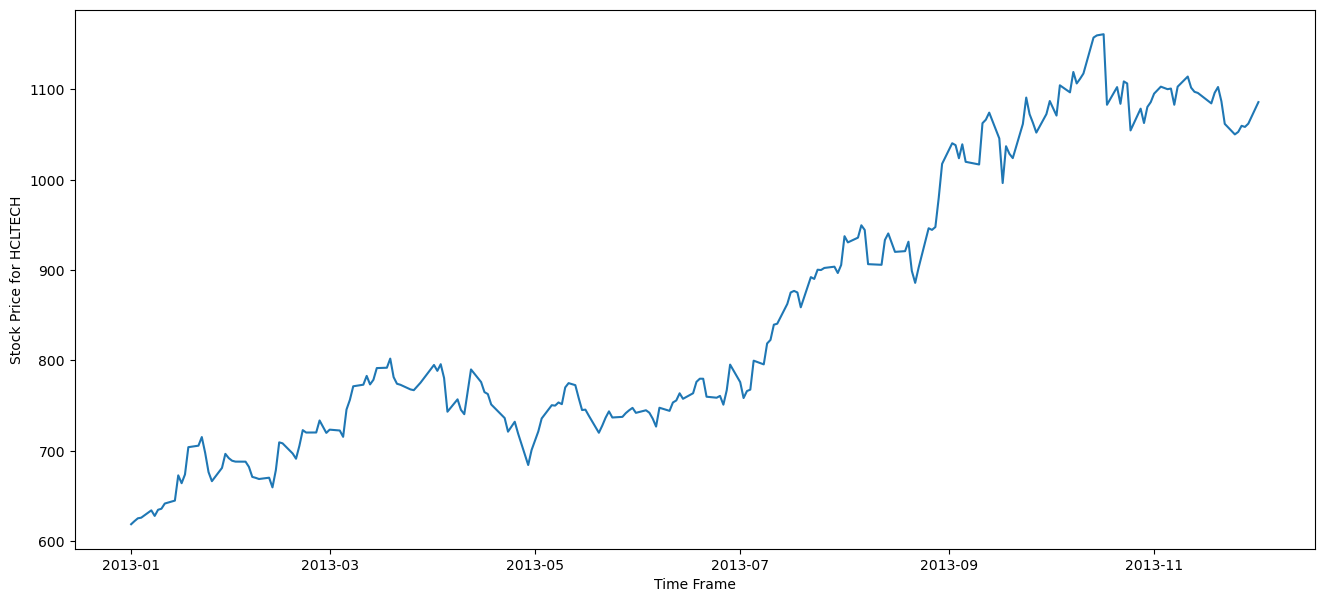

In [7]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

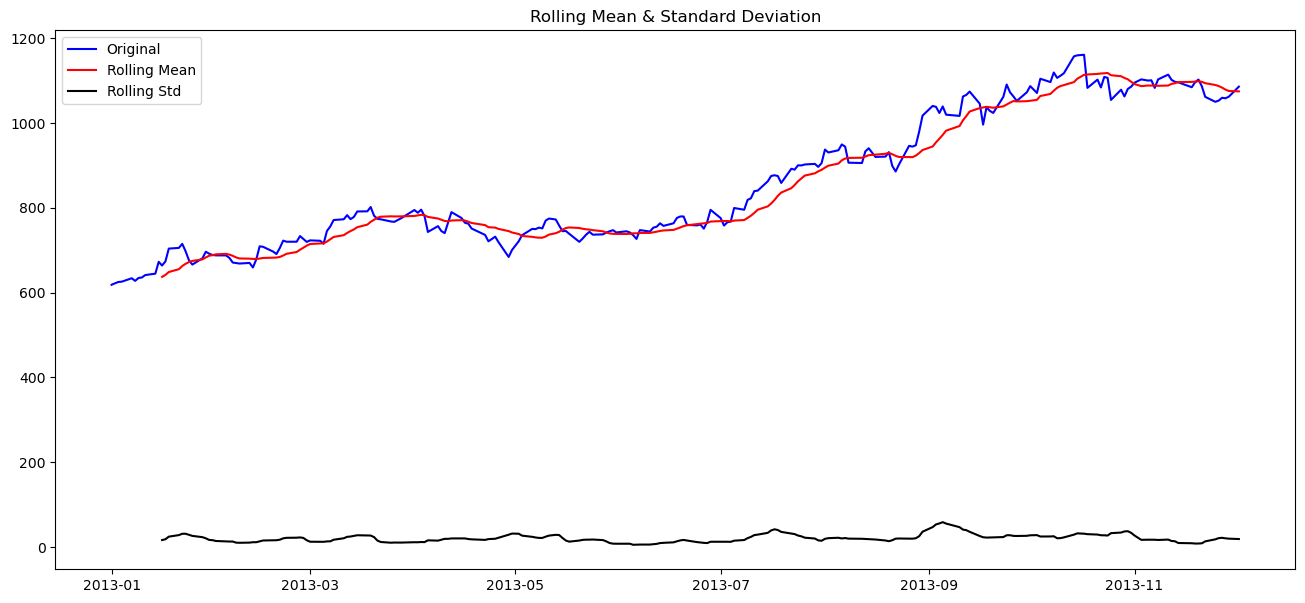

In [8]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

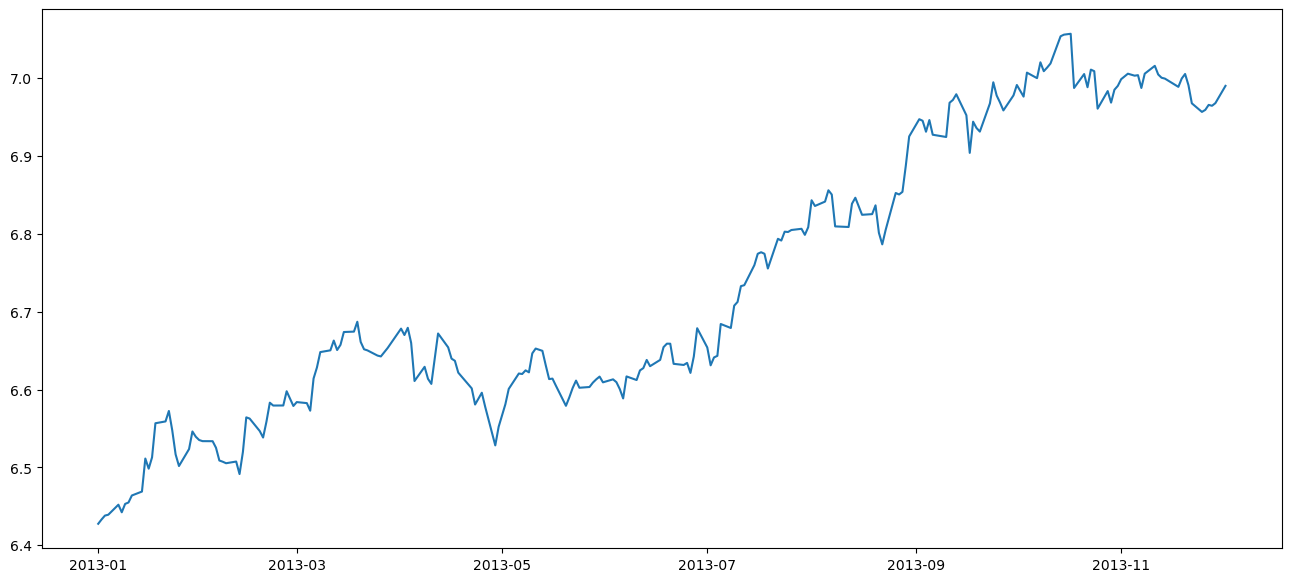

In [9]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

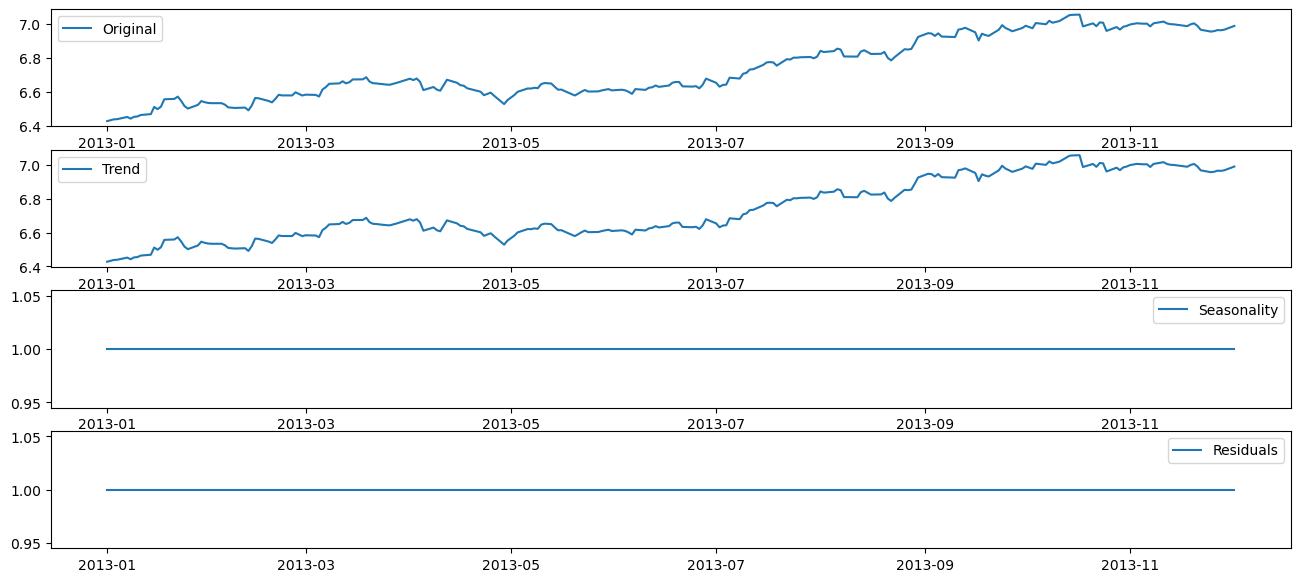

In [10]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', filt=None, period=1, two_sided=True, extrapolate_trend=0)
#x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0
#ts_log, freq=1, model = "multiplicative"

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')


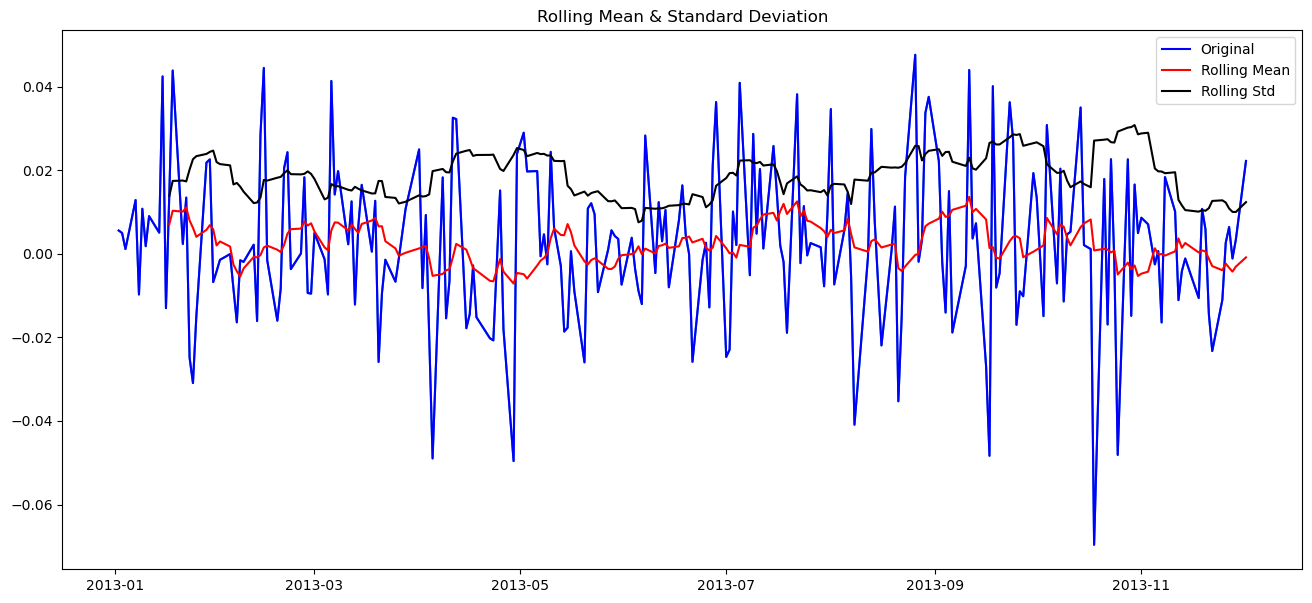

In [11]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [12]:
HCLTechStockData.sort_index(inplace= True)


In [13]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


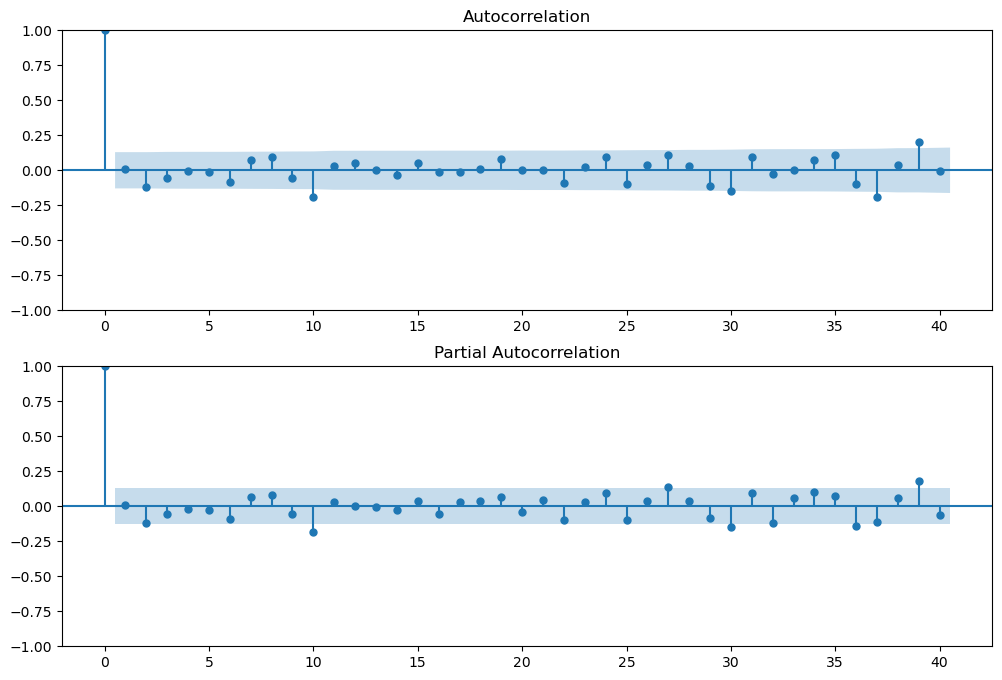

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [15]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [16]:
type(ts_log_diff)

pandas.core.series.Series

In [17]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\

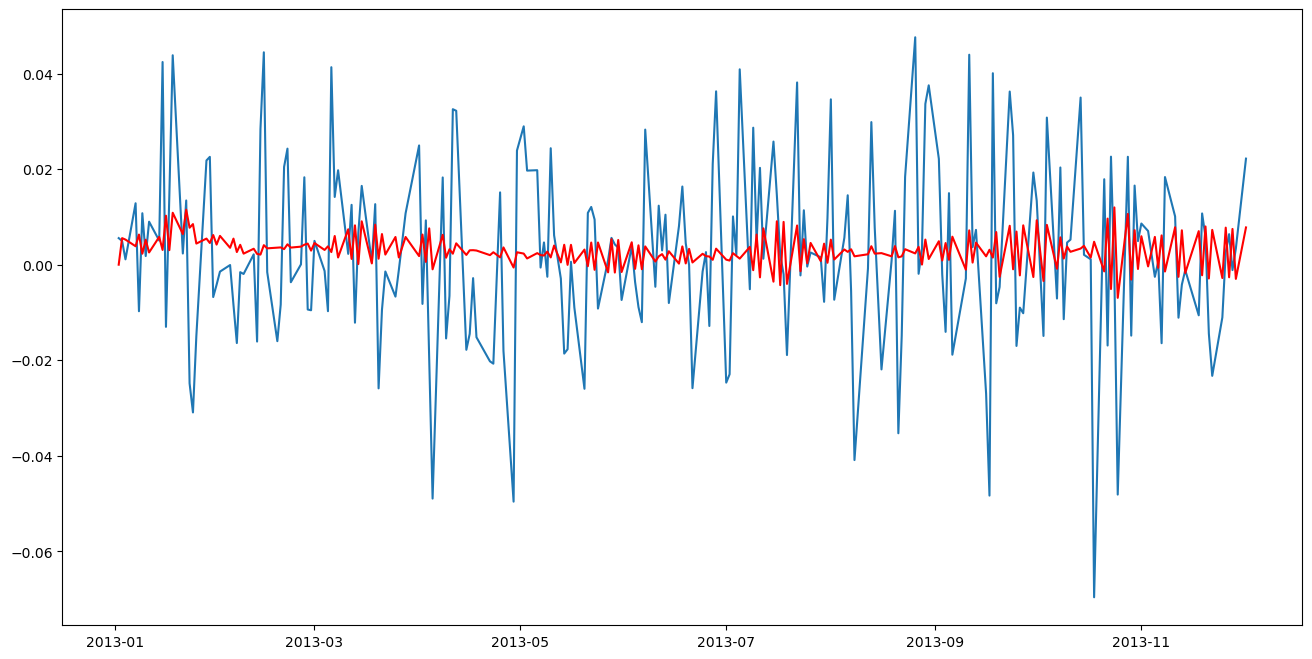

In [18]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [19]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005253
2013-01-07    0.003864
2013-01-08    0.006309
dtype: float64


In [22]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())


Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010814
2013-01-07    0.014678
2013-01-08    0.020986
dtype: float64


In [23]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438435
2013-01-07    6.442298
dtype: float64

Text(0.5, 1.0, 'RMSE: 94.1440')

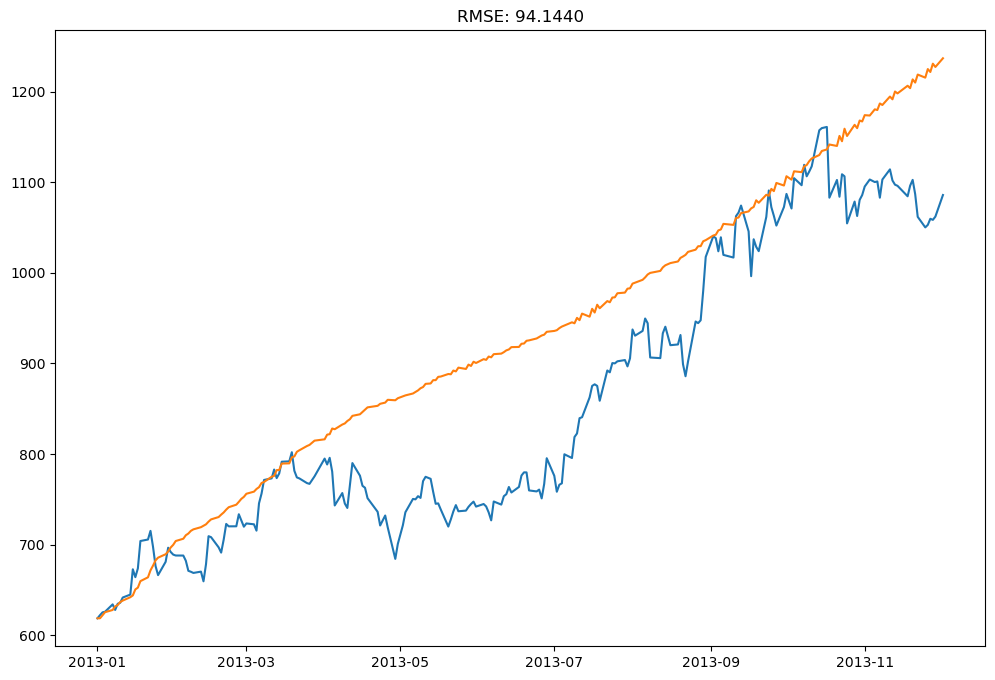

In [24]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [25]:
results_ARIMA.predict(10,20)

Date
2013-01-16    0.010255
2013-01-17    0.003043
2013-01-18    0.010871
2013-01-21    0.006416
2013-01-22    0.011504
2013-01-23    0.007738
2013-01-24    0.008499
2013-01-25    0.004419
2013-01-28    0.005463
2013-01-29    0.004544
2013-01-30    0.006207
Name: predicted_mean, dtype: float64

In [26]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [27]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.018, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.267 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)